# Telco Customer Churn Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding



### Background



### Scenario



### Objective


 
### Hypothesis: Influence of Top Investors



**A. Rationale:**



**B. Null Hypothesis (H0):**



**C. Alternative Hypothesis (H1):**



### Key Business Questions


##### 1.What are the primary factors contributing to customer churn?
Here we will perform analysis of features such as contract type, monthly charges, and tenure to determine which factors are most strongly associated with churn.


#### 2.How does customer churn vary across different demographics?
Examination of churn rates by gender, age group, and geographic region to identify any demographic patterns in customer retention.


#### 3.What impact do different service offerings have on customer churn?
Investigation into how various services like internet service type, phone service, and additional features affect the likelihood of customers churning.


#### 4.How effective are customer support interactions in reducing churn?
Evaluation of the relationship between customer support metrics (e.g., number of service calls, resolution times) and churn rates.


#### 5.Can we predict which customers are most likely to churn in the next month?
Development of a predictive model to identify high-risk customers based on historical data and feature analysis, enabling targeted retention efforts.



### Approach

[Back to Top](#Table-of-Contents)

## Step 2: Data Understanding


### Project Initialisation

In [35]:
pip install fancyimpute


Note: you may need to restart the kernel to use updated packages.


In [36]:
# Importing necessary libraries
from dotenv import dotenv_values
import pyodbc
import requests
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import re
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


`Data Collection`

<!-- To effectively analyse the Indian start-up ecosystem from 2018 to 2021, comprehensive data collection is crucial. The data will be sourced from multiple datasets that detail startup funding activities within this period. Each dataset will encompass various aspects essential for a holistic understanding of the funding landscape. Specifically, the datasets will include: -->


In [37]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("Login")
password = environment_variables.get("password")

In [38]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [39]:
# Use the pyodbc library to pass in the connection string.

connection = pyodbc.connect(connection_string)

In [40]:
# Accessing the data from the database
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

In [41]:
test_1 = pd.read_sql(query, connection)
test_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,False,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,False,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,True,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,True,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [42]:
test_2 = pd.read_csv("LP2_Telco-churn-second-2000.csv")
test_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [43]:
# Close the database connection
connection.close()

`Merge Data`

In [82]:
train_data = pd.concat([test_1, test_2], ignore_index=True)
train_data.to_csv("train_data.csv", index=False)

`Data Cleaning`

Effective data cleaning is crucial to ensure the integrity and usability of the dataset for analysis. The steps involved in data cleaning will include:


In [109]:
# Checking for missing values
missing_values = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64


In [110]:
# Handling missing values (this can vary depending on the context)
# Here, we'll fill missing numerical values with the median and categorical with the mode

for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    else:
        train_data[column].fillna(train_data[column].median(), inplace=True)


In [111]:
# Verify that there are no more missing values
print("\nMissing values after handling:\n", train_data.isnull().sum())


Missing values after handling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**A. Remove Duplicates:**

Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times. 


In [112]:
# Checking for duplicates
duplicates = train_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0




`Exploratory Data Analysis`

Inspect the dataset in depth, visualise it to answer analytical questions and plan the cleaning, processing and feature creation.


In [83]:
# getting data summary
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [84]:
#Get statistical summary of numerical columns 
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [85]:
train_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [86]:
train_data.shape

(5043, 21)

In [87]:
train_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [90]:
train_data["Churn"].isnull().sum()

np.int64(1)

In [92]:
# Transforming the 'Churn' column

# Step 1: Replace True/False with Yes/No
train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'})

In [94]:
# Replace NaN values with 'No'
train_data['Churn'].fillna('No', inplace=True)

In [95]:
# Replace Yes/No with 1/0 respectively
train_data['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [96]:
# change the dtype to int
train_data['Churn'] = train_data['Churn'].astype(int)

In [97]:
# Save the transformed dataset back to a file
train_data.to_csv('train_data.csv', index=False)

In [98]:
# Display the first few rows of the transformed dataset to verify the changes
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,0
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,0
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,0
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,1


In [ ]:
# Finding the value counts in the Churn colunm
train_data["Churn"].value_counts()

Churn
0    3707
1    1336
Name: count, dtype: int64

In [99]:
# calculate churn ratio for better insights into the column
churn_ratio = 100 * train_data['Churn'].value_counts() / len(train_data['Churn'])
churn_ratio_output = f"0 stands for No: {churn_ratio[0]:.2f}%\n1 stands for Yes: {churn_ratio[1]:.2f}%"
print(churn_ratio_output)

0 stands for No: 73.51%
1 stands for Yes: 26.49%


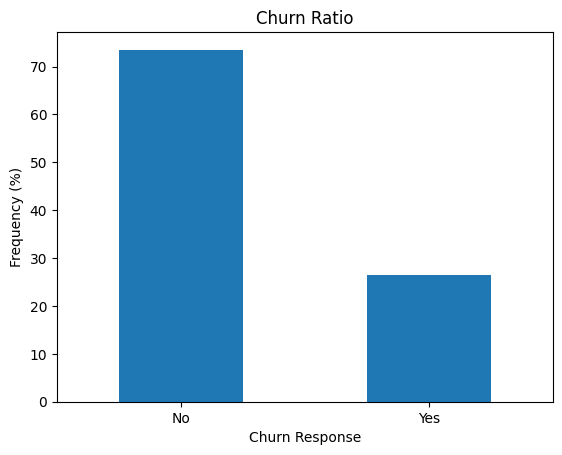

In [101]:
# Plotting the churn ratio
fig, ax = plt.subplots()
churn_ratio.plot(kind='bar', ax=ax)
ax.set_title('Churn Ratio')
ax.set_xlabel('Churn Response')
ax.set_ylabel('Frequency (%)')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.show()

In [105]:
# Counting the number of males and females who churned
churn_counts = train_data[train_data['Churn'] == 1]['gender'].value_counts()
print(churn_counts)

gender
Male      675
Female    661
Name: count, dtype: int64


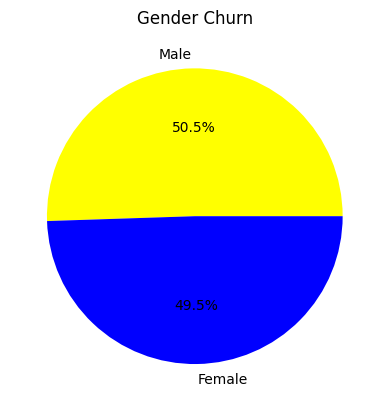

In [108]:
# Plotting the counts
fig, ax = plt.subplots()
colors = ['yellow', 'blue']
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax)
ax.set_title('Gender Churn')
ax.set_ylabel('')  # Remove the y-label for better appearance

plt.show()


**A. Univariate Analysis:**
Explore, analyze and visualize key variables independently of others



**B. Bivariate Analysis:**
Explore, analyze and visualize the relationship among the variables



**C. Deploy the visualisations to Power Bi:**


[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Impute Missing Values`

Use sklearn.impute.SimpleImputer



`Features Creation`




`Features Encoding`
From sklearn.preprocessing use OneHotEncoder to encode the categorical features.



`Feature Scaling`

Use sklearn.preprocessing.StandardScaler to scale the numerical features.



`Train set Balancing`

Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

[Back to Top](#Table-of-Contents)

## Step 4: Modeleling and Evaluation
Build, train, and test the four(4)models and models.

`Craete the Model`



`Train the Model`
use the following method to train the model: .fit() method



`Evaluate the Model on the Evaluation dataset`
Compute the valid metrics for the model



`Predict on the unknown dataset`
Use .predict method .predict_proba()



`Save the Model`



`repeat the above method by creating three(3)models`



`Model Comparison`



`Hyperparameter Analysis`


[Back to Top](#Table-of-Contents)

## Step 6: Document the entire process in an article on medium